In [19]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

%matplotlib inline

In [20]:
#Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

df = pd.read_csv('creditcard.csv', delimiter = ',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.shape

(284807, 31)

**Description**
It is a binary (2-class) classification problem

T = Number of seconds elapsed between this transaction and the first transaction in the dataset

A = Transaction amount

Class = 1 for fraudulent transactions, 0 otherwise


The dataset is highly imbalance with over 95% Class 1 and less than 5% Class 0

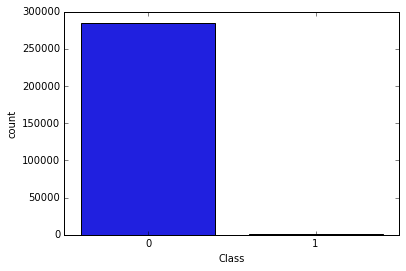

In [22]:
ax = sns.countplot(x="Class",  data=df) 

In [23]:
train = df.iloc[0 : 256322 , :]
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
test = df.iloc[256323 : -1 , :]
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
256323,157639.0,-0.356158,1.191407,-0.437619,1.173899,0.525368,-0.471524,0.199218,0.239205,-0.757000,...,-0.182842,-0.552938,0.033595,0.614989,-0.986868,0.524162,-0.019874,0.100141,1.98,0
256324,157639.0,2.025835,-0.046070,-1.249393,0.274412,-0.027561,-1.099714,0.154687,-0.263755,0.335313,...,0.302148,1.003410,-0.000059,0.113962,0.224938,-0.133709,-0.023353,-0.068055,0.89,0
256325,157640.0,-1.257880,0.577768,0.456237,-1.012853,-1.568841,0.939295,-2.090669,1.690625,-1.061729,...,0.127880,0.390366,0.107342,0.030993,-1.128331,0.685512,-0.394380,-0.022543,7.31,0
256326,157641.0,1.985106,0.398793,-2.451505,1.462487,1.035466,-0.846500,0.679494,-0.305204,0.198212,...,-0.038611,0.008407,-0.037846,0.383466,0.482723,-0.511534,-0.009908,-0.019809,38.17,0
256327,157641.0,-0.374887,-4.117293,-4.187522,1.183738,-0.310090,-0.899450,2.725253,-0.949894,-0.171054,...,1.015104,0.086303,-1.426768,-0.596596,0.204410,0.927533,-0.398025,0.125555,1336.00,0


In [25]:
# Separating out the target

y = df.iloc[:,-1].values

# Separating out the features

X = df.iloc[:,:30].values


In [26]:
# Resampling the minority to have the same number of sample with majority with synthetic resampling with KNN
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X, y = smote.fit_sample(X, y)

In [27]:
y = y.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", random_state= 100, max_depth= 3, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state= 0)
#cv = 5
scores = cross_val_score(model, X_train, y_train, cv=cv)
scores

array([ 0.95770561,  0.95734656,  0.9573832 ,  0.95657717,  0.95793276])

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.00)


In [31]:
'Validation set'
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.95729208800098486

In [33]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[54842,  2084],
       [ 2773, 54027]])

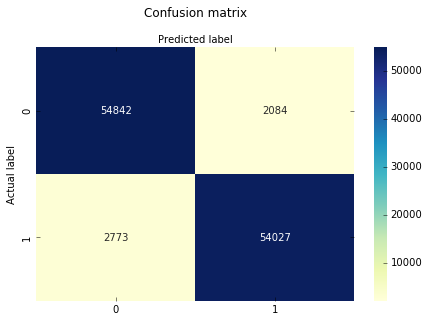

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     56926
           1       0.96      0.95      0.96     56800

   micro avg       0.96      0.96      0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



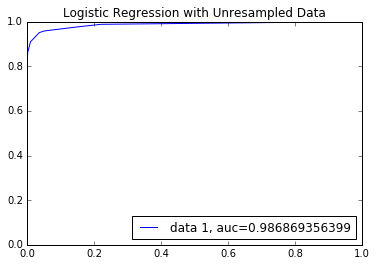

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logistic Regression with Unresampled Data')
plt.show()

# STOP

In [25]:
# Separating out the target

y_ = test.iloc[:,-1].values

# Separating out the features

X_new1 = test.iloc[:,:30].values

In [26]:
'Validation set'
y_pred_ = model.predict(X_new1)
accuracy_score(y_, y_pred_)

0.99936804409647861

In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_, y_pred_)
cnf_matrix1

array([[28461,     0],
       [   18,     4]])

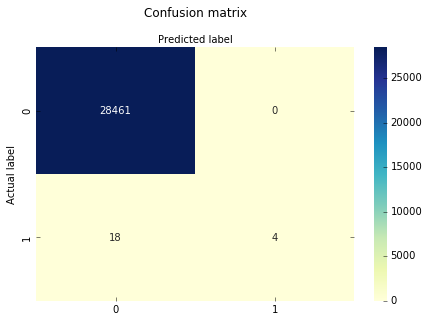

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_, y_pred_, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28461
           1       1.00      0.18      0.31        22

   micro avg       1.00      1.00      1.00     28483
   macro avg       1.00      0.59      0.65     28483
weighted avg       1.00      1.00      1.00     28483



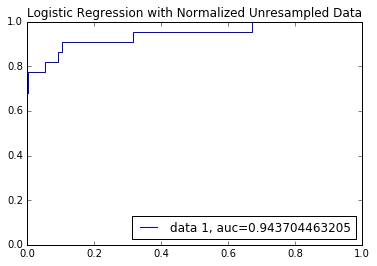

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba1 = model.predict_proba(X_new1)[::,1]
fpr, tpr, _ = roc_curve(y_,  y_pred_proba1)
auc = roc_auc_score(y_, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logistic Regression with Unresampled Data')
plt.show()